# CONFIGURACIONES INICIALES


# Python

Verificar que tenemos instalado python en el sistema operativo.

- Abrir la terminal y ejecutar: python -V

# Instalar Paquete para Entorno virtual (LINUX)

LINUX: Instalar el paquete necesario para poder crear entornos virtuales, para distribuciones basadas en debian, con el comando:

- apt install python3.10-venv

# Crear entorno virtual

Dentro de la carpeta del proyecto, abrir una terminal, o usar la terminal de Visual Studio Code y ejecutar lo siguiente:

- En linux ejecutar: python3 -m venv venv
- En windows ejecutar: py -m venv venv

# Activar el entorno virtual

- En linux ejecutar:source venv/bin/activate
- En windows ejecutar: .\venv\Scripts\activate

Si al intentar activar el entorno virtual en Windows genera un error, ejecutar el comando:

- Set-ExecutionPolicy -ExecutionPolicy RemoteSigned -Scope CurrentUser

# Instalar paquete PIP para poder instalar las librerias necesarias (LINUX)

LINUX: Instalar el paquete necesario para poder instalar las librerias, para distribuciones basadas en debian, con el comando

- apt install python3-pip

# Instalar librerias necesarias

Verificar que el entorno virtual se encuentre activado, debe figurar (VENV) en la terminal. Esto es necesario para instalar las librerias a nivel proyecto, y no de manera global.

- pip install pandas
- pip install opencv-python
- pip install matplotlib
- pip install nbformat
- pip install scikit-image
- pip install seaborn
- pip install tensorflow
- pip install -U scikit-learn
- pip install plotly
- pip install ipython
- pip install keras_preprocessing
- pip install ipykernel

La otra opción es instalar desde el archivo requirements.txt ejecutando:

- pip install -r .\requirements.txt

Luego ejecutar:

- pip install -U scikit-learn

# Pasos finales

- Una vez instalado todo, desactivar el entorno virtual ingresando en la terminal "deactivate"
- Luego volver a activar el entorno virtual.
- crear el kernel para ejecutar los comandos: ipython kernel install --user --name=venv
- reiniciar el Jupyter Notebook
- Seleccionar el kernel utilizado en el entorno virtual y no el nativo del sistema operativo, desde VSCODE en la zona superior derecha.

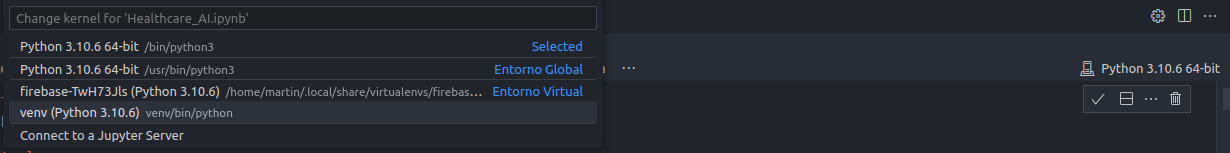


# IMPORTAR LIBRERÍAS Y DATASETS


In [1]:
import pandas as pd #libreria para la manipulacion de datos y analisis de datos
import numpy as np #permite utilizar funciones matematicas complejas
import seaborn as sns
import matplotlib.pyplot as plt #permite generar graficos personalizables bidimensionales
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
import plotly.graph_objects as go
import nbformat


In [2]:
# Datos que contienen la ruta a Brain MRI y su máscara correspondiente

# En una variable, asignamos un dataset (conjunto de datos que utilizaremos para entrenar y desarrollar los modelos de IA) que es leido a traves del metodo READ de pandas, utilizando la ruta.
brain_df = pd.read_csv('dataset/data_mask.csv')

In [3]:
# Obtener la ruta absoluta de la carpeta "dataset"

# se crean dos arreglos, para obtener en cada posicion la ruta absoluta de cada de imagen desde la carpeta dataset.
# Con el FOR, se recorre la longitud del data frame brain_df y se le va asignando, en cada iteracion, la ruta desde el dataset_folder. 

dataset_folder = os.path.abspath('dataset')

# Listas para almacenar las rutas de imágenes y las máscaras
image_paths = []
mask_paths = []

# Construir las rutas de imágenes y máscaras para todas las posiciones (indices)
for index in range(len(brain_df)):
    image_path = os.path.join(dataset_folder, brain_df.image_path[index])
    mask_path = os.path.join(dataset_folder, brain_df.mask_path[index])
    image_paths.append(image_path)
    mask_paths.append(mask_path)

# Ahora image_paths y mask_paths contienen las rutas de imágenes y máscaras para todas las posiciones
print(image_paths)
print(mask_paths)

['c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif', 'c:\\Users\\lucas\\OneDrive\\Desktop\\proyecto_final_PJML2\\dataset\\TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif', 'c:\\Users\\lucas\\OneDrive\\De

In [4]:
# Obtenemos la información de los datos
# Los datos se visualizan en 4 columnas: id, ruta abs de la imagen, ruta de la mascara y valor de mascara.
# image_path es la ruta donde se encuentra guarda la imagen de la resonancia magnetica
# mask_path es la ruta donde se guarda la mascara
# mask presenta unicamente dos valores: 0 o 1 . 0 no presenta anomalia, 1 cuando hay presente un tumor
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [5]:
# Obtenemos los encabezados y los datos de los primeros 50 registros para ver como estan compuestos. El valor se pasa entre ()
# La mascara, al representar 0, en los 50 primeros registros indica que los pacientes no presentan tumor.
# Un mismo paciente puede tener varias resonancias, que muestran la evolucion del paciente en el tiempo.
# Aca mostramos tres pacientes distintos (los distinguimos por su patient_id), cada uno con varias resonancias, y con el valor 0 asignado a cada una. Ninguno, segun estos datos, presenta tumor.
brain_df.head(50)

patient_id                                         image_path  \
0   TCGA_CS_5395_19981004  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1   TCGA_CS_5395_19981004  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2   TCGA_CS_5395_19981004  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3   TCGA_CS_5395_19981004  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4   TCGA_CS_5395_19981004  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
5   TCGA_CS_5395_19981004  TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif   
6   TCGA_CS_5395_19981004  TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif   
7   TCGA_CS_5395_19981004  TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif   
8   TCGA_CS_5395_19981004  TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif   
9   TCGA_CS_5395_19981004  TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif   
10  TCGA_CS_5395_19981004  TCGA_CS_6669_20020102/TCGA_CS_6669_20020102_1.tif   
11  TCGA_CS_5395_19981004  TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_1.tif   
12  TCGA_CS_5395_19981004  TCGA_DU_5851_19950428/TCGA_DU_5851_19950428_1.tif   
13  TCGA_CS_5395_19981004  TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_1.tif   
14  TCGA_CS_5395_19981004  TCGA_CS_6668_20011025/TCGA_CS_6668_20011025_1.tif   
15  TCGA_CS_5395_19981004  TCGA_DU_5849_19950405/TCGA_DU_5849_19950405_1.tif   
16  TCGA_CS_5395_19981004  TCGA_CS_6290_20000917/TCGA_CS_6290_20000917_1.tif   
17  TCGA_CS_5395_19981004  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_1.tif   
18  TCGA_CS_5395_19981004  TCGA_DU_5874_19950510/TCGA_DU_5874_19950510_1.tif   
19  TCGA_CS_5395_19981004  TCGA_DU_5855_19951217/TCGA_DU_5855_19951217_1.tif   
20  TCGA_CS_4944_20010208  TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_1.tif   
21  TCGA_CS_4944_20010208  TCGA_DU_5853_19950823/TCGA_DU_5853_19950823_1.tif   
22  TCGA_CS_4944_20010208  TCGA_DU_5852_19950709/TCGA_DU_5852_19950709_1.tif   
23  TCGA_CS_4944_20010208  TCGA_DU_6399_19830416/TCGA_DU_6399_19830416_1.tif   
24  TCGA_CS_4944_20010208  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_1.tif   
25  TCGA_CS_4944_20010208  TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_1.tif   
26  TCGA_CS_4944_20010208  TCGA_DU_6407_19860514/TCGA_DU_6407_19860514_1.tif   
27  TCGA_CS_4944_20010208  TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_1.tif   
28  TCGA_CS_4944_20010208  TCGA_DU_6405_19851005/TCGA_DU_6405_19851005_1.tif   
29  TCGA_CS_4944_20010208  TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_1.tif   
30  TCGA_CS_4944_20010208  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_1.tif   
31  TCGA_CS_4944_20010208  TCGA_DU_7014_19860618/TCGA_DU_7014_19860618_1.tif   
32  TCGA_CS_4944_20010208  TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_1.tif   
33  TCGA_CS_4944_20010208  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_1.tif   
34  TCGA_CS_4944_20010208  TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_1.tif   
35  TCGA_CS_4944_20010208  TCGA_DU_8163_19961119/TCGA_DU_8163_19961119_1.tif   
36  TCGA_CS_4944_20010208  TCGA_DU_7299_19910417/TCGA_DU_7299_19910417_1.tif   
37  TCGA_CS_4944_20010208  TCGA_DU_7309_19960831/TCGA_DU_7309_19960831_1.tif   
38  TCGA_CS_4944_20010208  TCGA_DU_8162_19961029/TCGA_DU_8162_19961029_1.tif   
39  TCGA_CS_4944_20010208  TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif   
40  TCGA_CS_4941_19960909  TCGA_DU_7301_19911112/TCGA_DU_7301_19911112_1.tif   
41  TCGA_CS_4941_19960909  TCGA_DU_7306_19930512/TCGA_DU_7306_19930512_1.tif   
42  TCGA_CS_4941_19960909  TCGA_DU_7302_19911203/TCGA_DU_7302_19911203_1.tif   
43  TCGA_CS_4941_19960909  TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_1.tif   
44  TCGA_CS_4941_19960909  TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_1.tif   
45  TCGA_CS_4941_19960909  TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_1.tif   
46  TCGA_CS_4941_19960909  TCGA_DU_8165_19970205/TCGA_DU_8165_19970205_1.tif   
47  TCGA_CS_4941_19960909  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_1.tif   
48  TCGA_CS_4941_19960909  TCGA_DU_A5TT_19980318/TCGA_DU_A5TT_19980318_1.tif   
49  TCGA_CS_494

In [6]:
# Ruta a la mascara de la MRI en la posición [1]
# Es una forma de acceder a la ruta de la mascara
brain_df.mask_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [7]:
# Ruta a la imagen de segmentación en la posición [1]
# Es una forma de acceder a la ruta de la imagen en la posicion 1

brain_df.image_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [8]:
# Obtenemos la cantidad de pacientes con y sin tumores

# 2556 muestras no tienen tumor, 1373 si tienen. Un %65 no tienen tumor. Al ser un porcentaje bajo el %35 restante, va a costar un poco mas el entrenamiento. Con un porcentaje mas alto, el entrenamiento seria mas eficiente. Con muestras mas balanceadas (y mas datos) , el entrenamiento es mas simple.
# La instruccion es, busca en la columna "mask" y decime cuantos valores diferentes hay en cada una. 
# Una mascara representa una imagen binaria. Debe tener el mismo tamaño que la imagen original. 
 
brain_df['mask'].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

# VISUALIZACIÓN DE DATOS


In [9]:
# Visualizamos todos los datos y como estan compuestos
# 0 representan las resonancias sin ningun tumor, 1 las que presentan posibles anomalias.

brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [10]:
# Visualizamos los diversos valores que posee la máscara. Para este caso en particular, es un tipo binario donde  0 = No presenta tumores, 1 = Presenta tumores

brain_df['mask'].value_counts().index

Index([0, 1], dtype='int64', name='mask')

In [18]:
# Usamos plotly para hacer un diagrama de barras interactivo con la distribución de los datos
# Usamos plotly con go para diseñar un grafico de barras, donde se va a representar la cantidad de observaciones en cada categoria (cuantos 0 y cuantos 1)

#2556 con indice 0: sanos. 1373 con indice 1: posiblemente presentan tumor. 

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [20]:
# Obtenemos el path de cada mascara de cada imagen
# Utilzamos pandas para acceder a la coleccion brain_df
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [21]:
# Obtenemos el path de cada imagen original
# Misma accion que en paso anterior, para acceder esta vez a la imagen original, no a la mascara.

brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

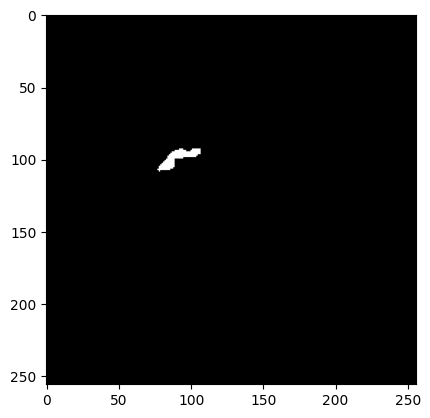

In [27]:
# visualizamos una imagen de tipo máscara en una determinada posición (indice) para visualizar el tumor.
# Accedemos a la posicion 623 mediante la instancia plotlib a traves del metodo imshow. Leemos una imagen con el metodo imread de la libreria cv2 pasandole como parametro la ruta de la imagen.

plt.imshow(cv2.imread(mask_paths[623]))


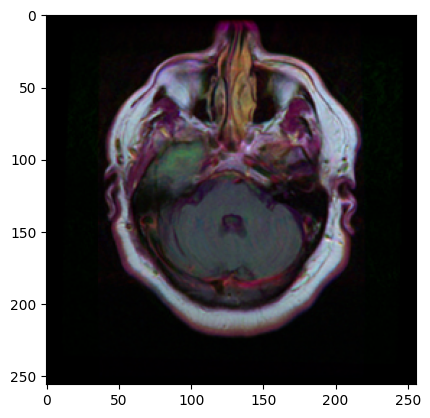

In [28]:
# visualizamos la imagen original de ese mismo registro, para visualizar sin la máscara.

plt.imshow(cv2.imread(image_paths[623]))

In [29]:
# obtenemos el máximo valor de píxel de la imagen, de 0 a 255

cv2.imread(mask_paths[623]).max()

255

In [30]:
# obtenemos el mínimo valor de píxel de la imagen, de 0 a 255

cv2.imread(mask_paths[623]).min()

0

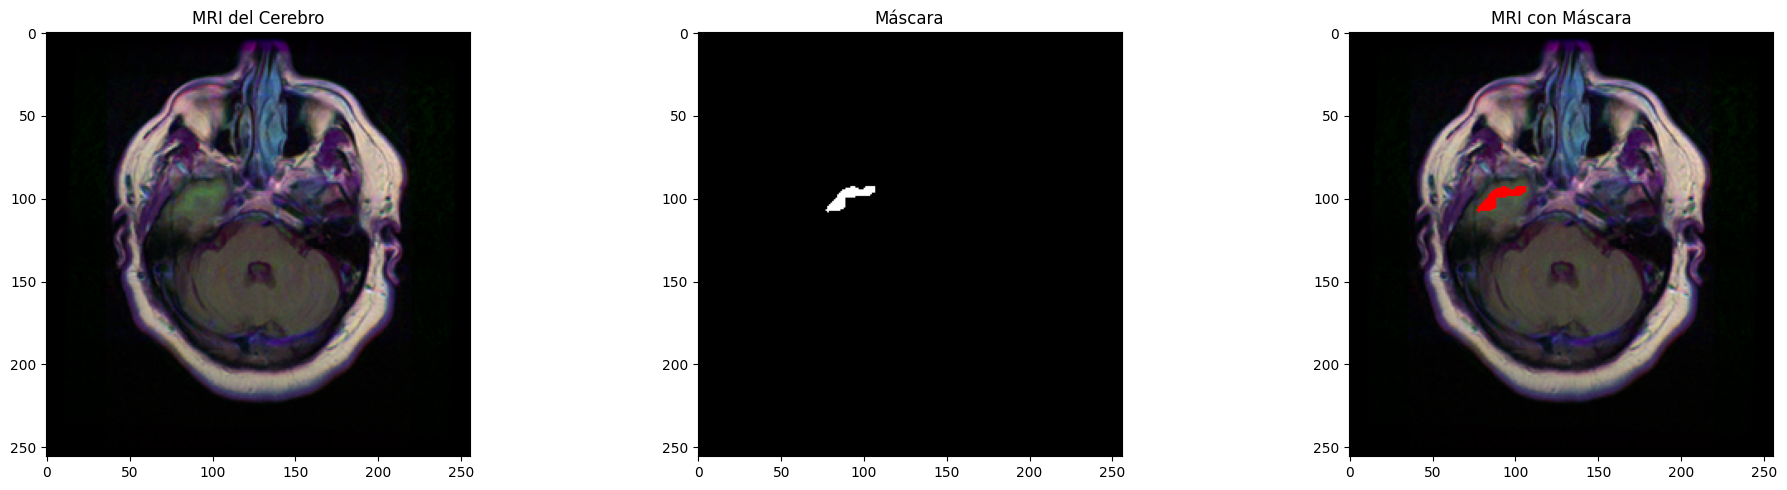

In [32]:
# Visualizamos una imagen de una resonancia magnética, con su máscara, de manera superpuesta
# Posición del DATASET
i = 623 #indice

if brain_df['mask'][i] == 1:
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # Solo una fila con tres columnas
                            # una fila, con 3 columnas

    img = io.imread(image_paths[i])
    # 1ER POSICION
    axs[0].title.set_text('MRI del Cerebro') # Seteamos el titulo de la imagen
    axs[0].imshow(img) # Mostramos la imagen

    mask = io.imread(mask_paths[i])
    # 2DA POSICION
    axs[1].title.set_text('Máscara')
    axs[1].imshow(mask, cmap='gray')

    img[mask == 255] = (255, 0, 0) # En todas las posiciones de la mascara -255- las pinta en rojo. 
    # 3ERA POSICION (se muestra la superposicion)
    axs[2].title.set_text('MRI con Máscara')
    axs[2].imshow(img)

    plt.tight_layout()
    plt.show()

# Representamos 6 imágenes de MRI seleccionadas aleatoriamente de entre los pacientes seguidas de su correspondiente máscara.


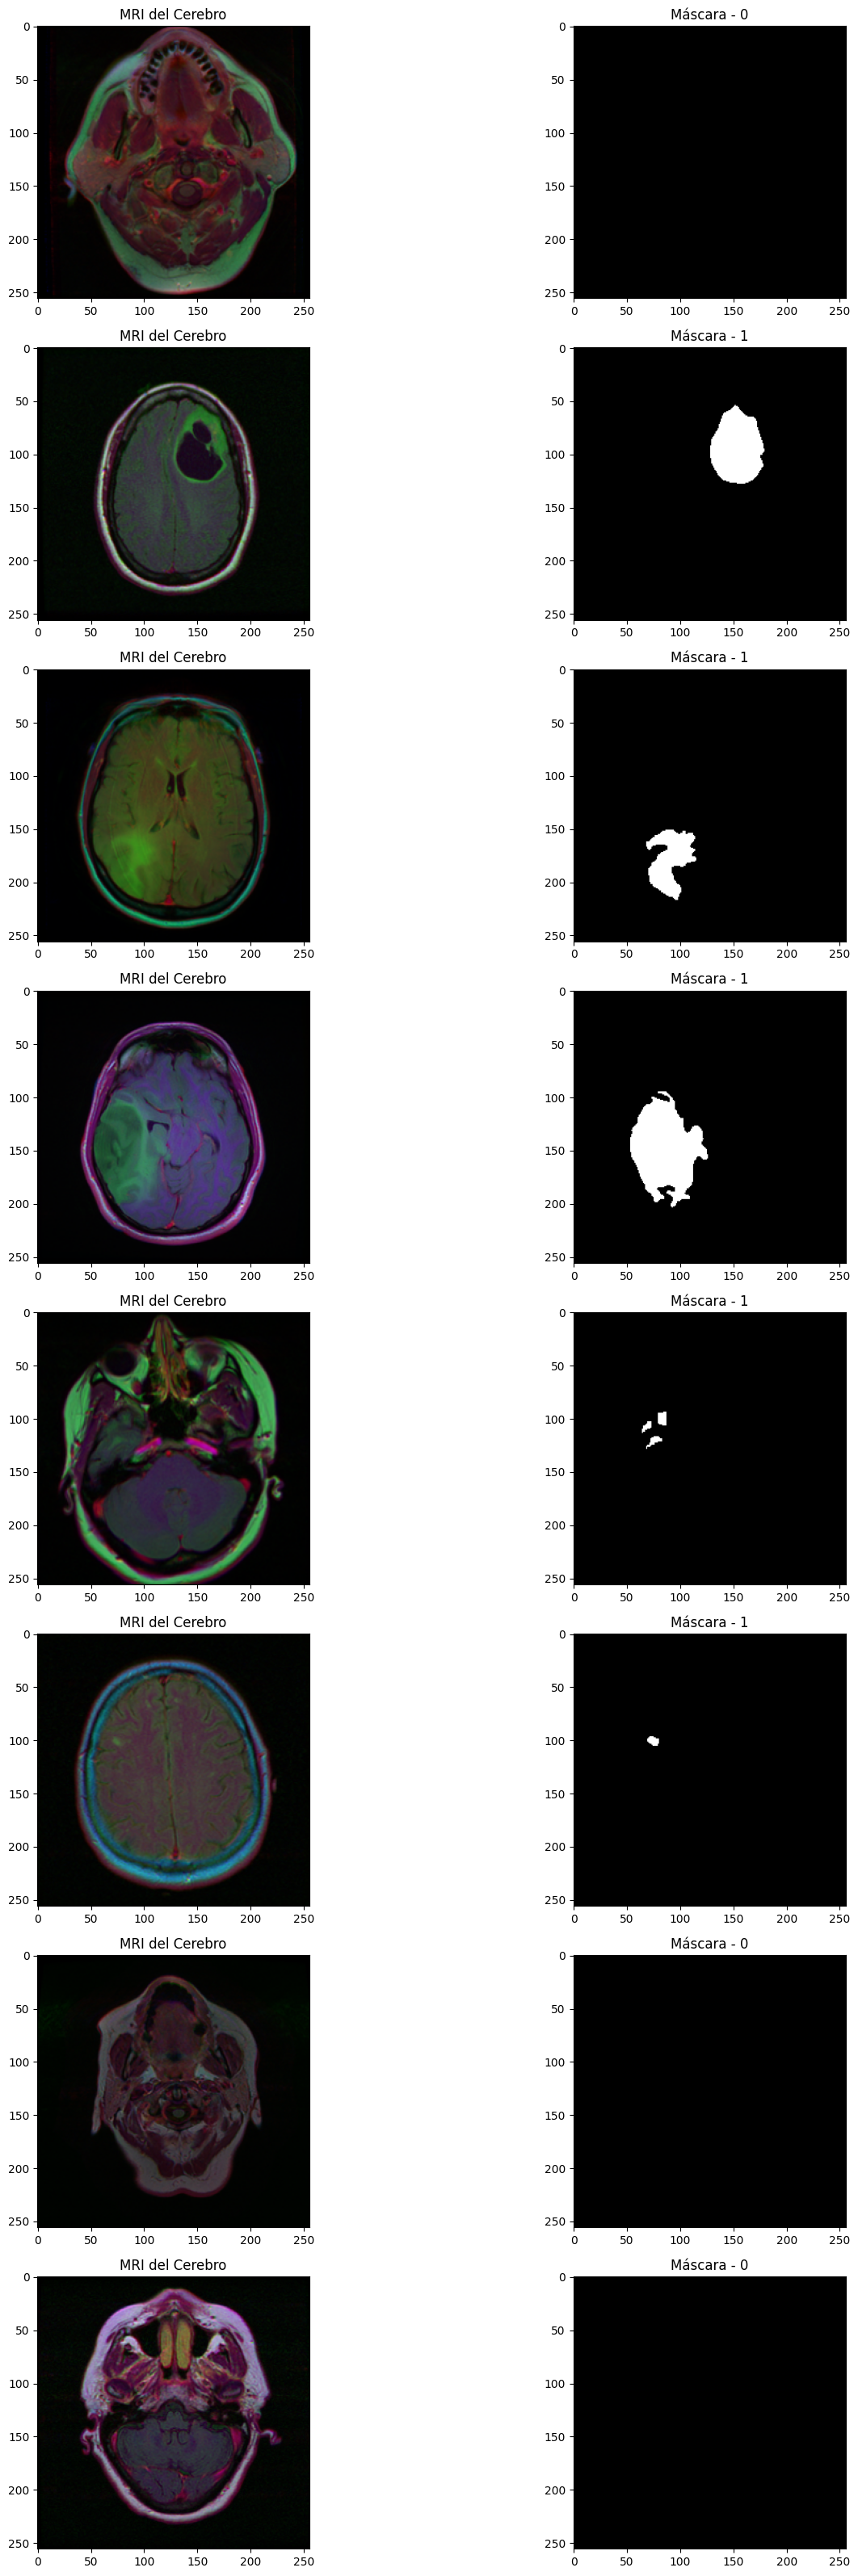

In [37]:
# Visualización básica de imágenes (MRI y Máscaras) en el dataset de forma separada de manera aleatoria
# De las 8 imagenes que representamos, 5 presentan posibles tumores. 

fig, axs = plt.subplots(8,2, figsize=(16,32))
count = 0
for x in range(8): # pasamos como parametro la cantidad de imagenes que queremos que nos traiga, yo use 8. Cambiar el parametro para subplots de manera que coincidan. 
  i = random.randint(0, len(brain_df)) # Seleccionamos un índice aleatorio
  axs[count][0].title.set_text("MRI del Cerebro") # Configuramos el título
  axs[count][0].imshow(cv2.imread(image_paths[i])) # Mostramos la MRI 
  axs[count][1].title.set_text("Máscara - " + str(brain_df['mask'][i])) # Colocámos el título en la máscara (0 o 1)
  axs[count][1].imshow(cv2.imread(mask_paths[i])) # Mostramos la máscara correspondiente 
  count += 1

fig.tight_layout()

# Representamos 12 imágenes de MRI seleccionadas aleatoriamente de entre los pacientes enfermos seguidas de su correspondiente máscara, tanto la imágen de la MRI junto con su máscara (de color rojo) una encima de la otra.


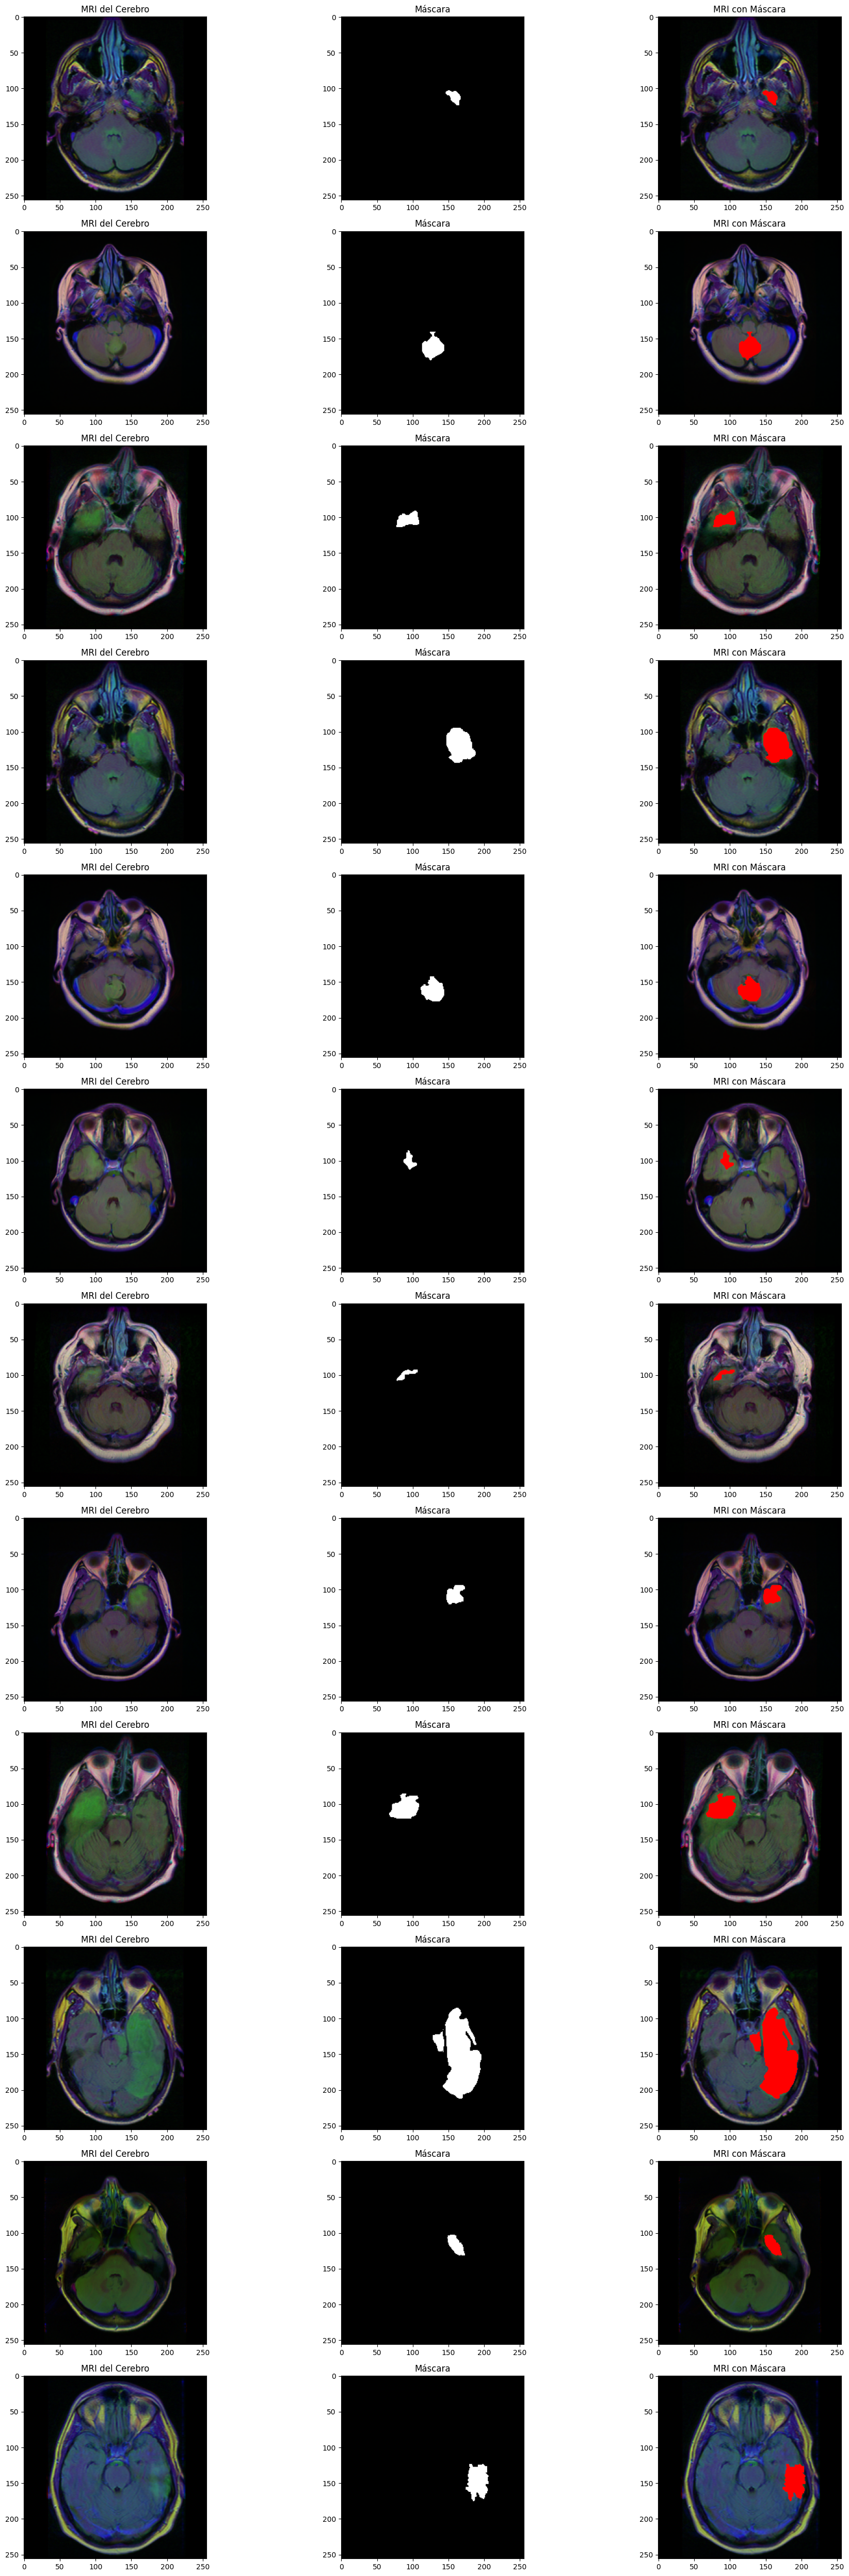

In [11]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(brain_df)): # Se recorre desde la posicion i -0- hasta la longitud de brain_df, 
  if brain_df['mask'][i] ==1 and count <12: # Se va a fijar que la mascara sea igual a 1 y la va a traer, siempre que la cantidad sea menor a 12. Va a traer 12 entradas.
    img = io.imread(image_paths[i])
    axs[count][0].title.set_text('MRI del Cerebro')
    axs[count][0].imshow(img)

    mask = io.imread(mask_paths[i])
    axs[count][1].title.set_text('Máscara')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255, 0, 0)
    axs[count][2].title.set_text('MRI con Máscara')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()


# ENTRENAMOS UN MODELO CLASIFICADOR PARA DETECTAR SI EXISTE TUMOR O NO


In [12]:
# EL OBJETIVO DE ESTA PARTE EN ADELANTE ES DETECTAR SI HAY O NO UN TUMOR EN LA RESONANCIA MAGNETICA

# Para esto, cargamos una red ya entreneda, la RESNET 50. 

# Visualizamos que tenemos cuatro columnas

brain_df.shape # Analizamos la cantidad de columnas de la coleccion DF

(3929, 4)

In [13]:
# Eliminamos la columna de identificador del paciente, con el metodo drop, especificando la etiqueta/nombre y el eje correspondiente (ID) . 
# 

brain_df_train = brain_df.drop(columns = ['patient_id'])

In [14]:
# Podemos visualizar que tenemos solo tres columnas ahora, en vez de 4.  
brain_df_train.shape

(3929, 3)

In [15]:
# Convertir los datos en la columna de máscara a formato de string, para usar el modo categórico en flow_from_dataframe 

# Ya que usamos tensorflow, para usar la funcion flow_from_dataframe, tenemos que convertir los datos de la columna Mask (que son de tipo entero) a tipo String (texto) 

brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [16]:
# Obtenemos la información del dataframe
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [17]:
# Dividimos los datos para el entrenamiento y testing dejando un 15% para testeos (validacion) y 85% para entrenamiento

from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15) # Importamos la funcion train_test_split y le pasamos como parametro lo que va a dividir en el valor que tambien le pasamos. El 15% va a ser para el testeo.
                                                                 # Nuestro conjunto de datos original se divide en 2 subconjuntos.

In [18]:
# Creamos el generador de imágenes
# Utilizamos la clase ImageDataGenerator del modulo de Keras para pre procesar y generar imagenes en un formato adecuado para ser utilizado como entrada en el modelo. 


from keras_preprocessing.image import ImageDataGenerator

# Creamos un generador de datos que escale los datos de 0 a 1 y haga una división de validación de 0,15
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15) # Esto indica que el generador va a reescalar todos los pixeles sobre 255 y va a utilizar un 15% para la correspondiene validacion, para que no ocurra un sobre ajuste
                                                                       # y para que el modelo pueda generalizar las caracteristicas y no memomorizarlas.


In [19]:
# Creamos un generador de datos para el ENTRENAMIENTO

train_generator=datagen.flow_from_dataframe(
dataframe=train, # tomamos el df de entrenammiento
directory= './dataset/', # le pasamos la direccion donde se cargara 
x_col='image_path', # tomamos la ruta de la imagen
y_col='mask', # el valor que queremos predecir (la mascara)
subset="training",  # determinamos el subconjunto de entrenamiento
batch_size=16, # batch size va a ser el tamaño de cada lote de imagenes
shuffle=True, # usamos el valor True para que mezcle cada vez que se ejecute y que no aprende por el orden.
class_mode="categorical", # predecimos una categoria 
target_size=(256,256)) # indicamos el tamaño de la imagen de salida.

# Creamos un generador de datos para la VALIDACION

valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './dataset/',
x_col='image_path',
y_col='mask',
subset="validation", # utilizamos otro subcojunto
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Creamos un generador de datos para IMAGENES DE PRUEBA

test_datagen=ImageDataGenerator(rescale=1./255.) # Subconjunto TEST que toma el 15% del conjunto original

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './dataset/',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))

# Cuando se ejecuta esta clase, nos muestra el detalle de todos los subconjuntos de imagenes generadas. En total, se generaron 2839 imagenes.


Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [20]:
# Obtenemos el modelo base de ResNet50 (red neuronal entrenada)

# Aplicamos el aprendizaje por transferencia

basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

# Descargamos la RESNET 50 con los pesos de entrenamiento, que fueron utilizados para este conjunto de datos.  No incluimos la capa densa del final (FALSE)

In [21]:
# Obtenemos el resumen del modelo base con el detalle de parámetros

# La mayoria de los parametros (23534592) son entrenables.

basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [22]:
# Congelamos los pesos del modelo, para que no necesitemos entrenarlo mas.

for layer in basemodel.layers:
  layers.trainable = False

In [24]:
# Agregamos una cabecera de clasificación al modelo base, que anteriormente pusimos como false; de esta manera, podemos establecer nuestra propia cabecera. 

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [25]:
# Visualizamos los parámetros (datos) del modelo

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

## Establecemos los siguientes pasos para realizar el entrenamiento

In [26]:
# # Compilamos el modelo

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [27]:
# Seteamos las configuraciones para realizar el entrenamiento.

# # Utilizamos la parada temprana para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Ejecutamos una parada temprana, cuando el minimo lleve mas de 5 iteraciones sin mejorar.

# # Guardamos el mejor modelo con la menor pérdida de validación
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

## Quienes no quieran entrenar el model, y usar el mejor guardado, obviar el HISTORY Y el GUARDADO

In [27]:
# Generamos el entrenamiento

# EN ESTA SECCION, SE ENTRENA AL MODELO.


history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.7466 - accuracy: 0.6982
Epoch 1: val_loss improved from inf to 0.59296, saving model to classifier-resnet-weights.hdf5


c:\Users\lucas\OneDrive\Desktop\proyecto_final_PJML2\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


177/177 [==============================] - 581s 3s/step - loss: 0.7466 - accuracy: 0.6982 - val_loss: 0.5930 - val_accuracy: 0.6754


In [28]:
# Guardamos la arquitectura del modelo entrenado en un archivo json
model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

## Continuar desde ACÁ

In [28]:
# Modificamos la arquitectura de la red agregando una capa y un Dropouts más a fin de mejorar el rendimiento

# El Dropout se aplica durante el entrenamiento de la red neuronal en donde se desactivan aleatoramiente ciertos nodos de la red, lo que implica que ciertas partes de la red no se utilicen en cada iteracion del entrenamiento.
# Esto obliga a que la red se aprenda las caracteristicas mas genericas y no se acostumbre a memorizar datos, lo que mejora el desempeño de la red.


headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel) # SE UTILIZA EL 30%
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
# Agregamos una capa más de 256 con la misma rectificadora lineal unitaria
headmodel = Dense(256, activation = "relu")(headmodel)
# Agregamos una capa más de Dropout con el mismo valor
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

# Este procedimiento permite generar una nueva versión del modelo.

In [29]:
# Visualizamos los nuevos parámetros del modelo

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

# Una vez realizado esto volvemos a entrenar el modelo con los nuevos parámetros establecidos y logramos una mejora significativa


In [30]:
# volvemos a compilar el modelo

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [31]:
# Volvemos a generar la parada temprana y guardamos el mejor modelo con la menor pérdida de validaciones

# Utilizamos la parada temprana para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Guardamos el mejor modelo con la menor pérdida de validación

checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

## Quienes no quieran entrenar el model, y usar el mejor guardado, obviar el HISTORY Y el GUARDADO

In [33]:
# VOLVEMOS A ENTRENAR EL MODELO

# Generamos de nuevo el entrenamiento con los nuevos parámetros agregados

history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 1, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

177/177 [==============================] - ETA: 0s - loss: 0.6023 - accuracy: 0.7425
Epoch 1: val_loss improved from inf to 12.08627, saving model to classifier-resnet-weights.hdf5


c:\Users\lucas\OneDrive\Desktop\proyecto_final_PJML2\env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


177/177 [==============================] - 575s 3s/step - loss: 0.6023 - accuracy: 0.7425 - val_loss: 12.0863 - val_accuracy: 0.3226


In [35]:
# Volvemos a guardar la arquitectura del modelo entrenado en un archivo json

model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

## Continuar desde ACÁ

# EVALUAMOS EL RENDIMIENTO DEL MODELO ENTRENADO


In [36]:
# Cargamos el modelo pre entrenado generado en el JSON “resnet-50-MRI.json”  (MODELO ENTRENADO GUARDADO)

# EVALUAMOS SU EFICACIA CON DATOS NUEVOS (conjunto de datos de prueba que nunca se utilizó para entrenar el modelo)

# Una vez entrenado el modelo de clasificacion, es de suma importancia evaluar su eficacia, para poder determinar qué tan bien se desempeña con datos nuevosy determinar su capacidad para generalizar y realizar 
# predicciones precisas en un entorno real.

with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Cargamos el modelo pre entrenado generado en el JSON “classifier-resnet-model.json”  (MODELO ENTRENADO)

#with open('classifier-resnet-model.json', 'r') as json_file:
#    json_savedModel= json_file.read()

# Cargamos el modelo pre entrenado generado en el JSON “weights.hdf5” 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [37]:
# Hacemos la predicción. Esta se realiza sobre el 15% de imágenes que se dejaron para testeos, no con las que se usaron para entrenar. Las peticiones las realizamos en lotes de 16 imágenes cada uno.
# La prediccion se realiza sobre el 15% de las imagenes que se dejaron para los testeos y no sobre las que se usaron para entrenar.


test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1) # La prediccion se realiza sobre lotes de 16 imagenes

36/36 [==============================] - 23s 604ms/step


In [38]:
# De las imagenes chequeamos que sean dos salidas (tiene o no tiene tumor)

# Podemos ver que tenemos una tupla (conjunto ordenado e inmutable de elementos/datos del mismo o diferente tipo)
# Cantidad de tipos de salida (Si tiene tumor, no tiene tumor): 2 

test_predict.shape 

(576, 2)

In [39]:
# Visualizamos un array con la probabilidad de que no contenga tumor en la primera columna y la probabilidad de que tenga en la segunda. Para cada imagen se genera un array con los dos valores

# Esta variable test_predict contiene las predicciones realizadas por el modelo de clasificacion.
# Al correr esto, obtenemos un tensor de numpy: contiene una fila por cada prediccion que hizo y tammbien una columna por cada caracteristica utilizada para hacer la prediccion.
test_predict

array([[9.9999917e-01, 8.9088098e-07],
       [1.0000000e+00, 1.2376300e-10],
       [9.9889588e-01, 1.1040379e-03],
       ...,
       [2.7221951e-04, 9.9972779e-01],
       [1.0000000e+00, 2.0582690e-10],
       [9.9975115e-01, 2.4889840e-04]], dtype=float32)

In [41]:
# Obtenemos la clase predicha a partir del modelo 
# con la Funcion argmax podemos ver la probabilidad máxima de cada fila, donde si en la posición 0 indica que probablemente no contenga un tumor, la posición 1 que si lo contenga.

predict = [] # La informacion se guarda en esta variable y luego se visualiza en forma de array a traves del metodo np.asarray

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [42]:
# Ahora visualizamos el array con los valores de probabilidad

predict

array(['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1',
       '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1',
       '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1

In [43]:
# Dado que usamos el generador de prueba, se limita el número de imágenes a leer (predecir), debido al tamaño del lote
# El vector anterior, que son predicciones, lo tenemos que contrastar con el vector original.

# El original tiene el mismo tamaño, de 576.

original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [45]:
# Una vez realizado esto, podemos obtener la tasa de acierto del modelo con el set de datos de testeos

# En base a esto, podemos afirmar que esta red neuronal tiene una tasa de efectividad del 99% sin aplicar una matriz de confusion.


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9809027777777778

<Axes: >

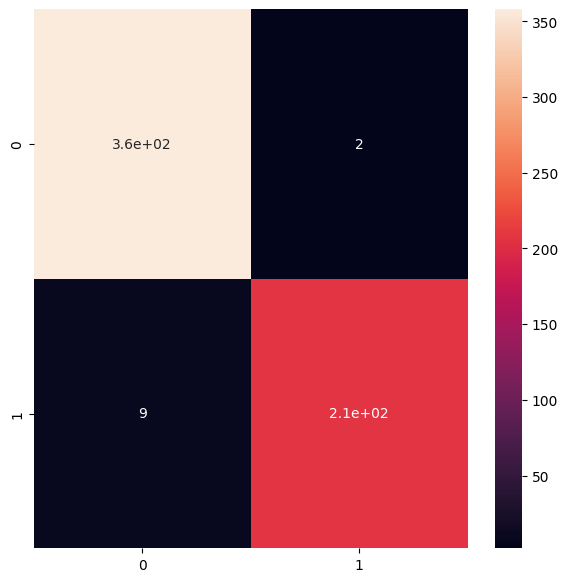

In [46]:
# La red neuronal tiene un porcentaje de efectividad del 98,09% sin aplicar la matriz de confusión. 
 
# Representamos (en un grafico) la matriz de confusión, que nos permite identificar los falsos positivos y falsos negativos

# A partir del grafico, podemos ver que dos muestras dieron un falso positivo, y 9 muestras dieron un falso negativo, dando un total de 11 muestras erroneas.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

In [47]:
# Con esto podemos ver que 2  muestras dieron un falso positivo, y 9 muestras dieron un falso negativo. Dando un total de 11 muestras erróneas
# Imprimimos el reporte/informe de clasificación y comenta sobre los resultados de precisión, recuperación y F1-Score (media entre la precisión y recall)

# La precision es de 0.98 en ausencia de tumor y del 0.99 en presencia de tumor. 

# El recall tiene en cuenta los falsos positvos y falsos negativos. 

# El f1-score es una medida para el rendimiento del modelo general. Se calcula tomando la media armonica de lo que es la precision y el recall.

from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       360
           1       0.99      0.96      0.97       216

   micro avg       0.98      0.98      0.98       576
   macro avg       0.98      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



c:\Users\lucas\OneDrive\Desktop\proyecto_final_PJML2\env\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
c:\Users\lucas\OneDrive\Desktop\proyecto_final_PJML2\env\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
c:\Users\lucas\OneDrive\Desktop\proyecto_final_PJML2\env\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
c:\Users\lucas\OneDrive\Desktop\proyecto_final_PJML2\env\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar

# CONSTRUIMOS UN MODELO DE SEGMENTACIÓN PARA LOCALIZAR EL TUMOR


In [48]:
# A PARTIR DE ESTE PUNTO, LA RED NEURONAL YA SE ENCUENTRA ENTRENADA. 

# Obtenemos el dataframe que contiene las resonancias magnéticas que tienen máscaras asociadas.

brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [49]:
# Tenemos que hay 1373 muestras con máscaras asociadas.

# Dividimos los datos en conjuntos de testeo y de entrenamiento

from sklearn.model_selection import train_test_split

# Dividimos en dos modelos para entrenar el 85% y para validar el 15%

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)


In [50]:
# Creamos una lista separada para imageId (el id de la imagen), classId (el id de la clase) para pasar al generador 

train_ids = list(X_train.image_path) # Lista separada para el imageId
train_mask = list(X_train.mask_path) # Lista separada para la classId

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

# Construimos unas rutas de imágenes y máscaras para entrenamiento y validación


data_folder = "./dataset/" # Ruta a la carpeta dataset

train_ids = [os.path.join(data_folder, filename) for filename in train_ids]
train_mask = [os.path.join(data_folder, filename) for filename in train_mask]

val_ids = [os.path.join(data_folder, filename) for filename in val_ids]
val_mask = [os.path.join(data_folder, filename) for filename in val_mask]




In [51]:
# Importamos utilities para la función de pérdida personalizada y el generador de datos personalizados

from dataset.utilities import DataGenerator # Importamos desde .utilities la clase DataGenerator

# Creamos los generadores de imágenes para poder cargarlas durante la fase de entrenamiento de forma dinámica

training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)


In [52]:
# Creamos una función para los bloques residuales  (estructura de la red neuronal), llamados res block, de la RESUNET


# Un bloque residual se compone de varias capas de procesamiento (tanto capas de convolucion como de normalizacion) que son utilizadas para
# transformar la entrada de una red neuronal en un salida. La salida de un bloque de residuo se suma a la entrada original de la red antes de 
# pasar a la siguiente capa. De esta manera, la red puede saltarse algunas capas de procesamiento sin perder la info con la que ya cuenta.

def resblock(X, f):  # SE CREA UNA FUNCION PARA LOS BLOQUES RESIDUALES.
  

  # Hacemos la copia de la entrada
  X_copy = X

  # Ruta principal

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X) 

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Ruta corta

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

    # Agregamos la salida de la ruta principal y la ruta corta juntas

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X


In [54]:
# Creamos otra función para escalar y concatenar los valores pasados

def upsample_concat(x, skip): # CON ESTA FUNCION, ENSANBLAMOS LA SALIDA ANTERIOR. upsample escala y concatena los valores pasados.
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge


# IMPLEMENTAMOS EL MAPA DE RUTA DE LA ARQUITECTURA RESUNET


In [57]:
input_shape = (256,256,3)

# PASAMOS VARIOS PARAMETROS : 

# Forma del tensor de entrada
X_input = Input(input_shape)

# LAS FASES SE PUEDEN IR MODIFICANDO Y  VIENDO EL COMPORTAMIENTO.

# Al mejorar el entrenamiento de la red, permitimos que los gradientes fluyan mas facilemente a traves de la misma red

# PRIMERAS 4 FASES: FASES DE PULLING


# Fase 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input) # reluque: rectificador lineal unitario
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Fase 2
conv2_in = resblock(pool_1, 32)  # LA FUNCION RESBLOCK APLICA UN BLOQUE RESIDUAL AL TENSOR DE ENTRADA.
                                 # El bloque residual consiste de dos capas convolucionales. Cada una incluye una capa de localizacion por lotes y una funcion de activacion. 
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Fase 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Fase 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Fase 5 (Cuello de Botella)
conv5_in = resblock(pool_4, 256)

# FASES DE ESCALADA: APSAMPLING

# Fase de Escalada 1
up_1 = upsample_concat(conv5_in, conv4_in)  # Esta funcion aplica una operacion de upsampling al tensor de entrada, lo concatena con otro tensor y aplica una capa convolucional 
                                            # junto con una funcion de activacion relu, al tensor ya concatenado.Esto siempre se aplica en el upsampling para poder recuperar la
                                            # resolcion espacial de la imagen de entrada.
                                
up_1 = resblock(up_1, 128)

# Fase de Escalada 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Fase de Escalada 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Fase de Escalada 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Salida Final

# FUNCION DE ACTIVACION SIGMOID: la funcion sigmoidal es utilizada como funcion de activacion de las neuronas que conforman una red neuronal artificial;
# permite describir una evolucion.

output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output ) # Usamos un objeto model, que define el tensor de entrada (x input) y produce el tensor de salida (output)


In [58]:
# Imprimimos el resumen del modelo de segmentación y enumeramos el número total de parámetros entrenables

# El modelo de segmentacion toma una imagen como entrada y genera una mascara de segmentacion como salida, que es una imagen con las
# mismas dimensiones que la imagen de entrada pero con cada pixel etiquetado. La arquitectura consiste en un downsampling en la que 
# se disminuye el tamaño (la imagen se va reduciendo gradualmente aplicando una serie de capas convulucionales y de puling). A la vuelta,
# se aplica un upsampling que aumenta el tamaño de la imagen y en donde la imagen reducida se le aplica una serie de operaciones a traves
# de capas de convolucion traspuestas y de concatenacion.

model_seg.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 256, 256, 16)         448       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_26 (Ba  (None, 256, 256, 16)         64        ['conv2d_27[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_28 (Conv2D)          (None, 256, 256, 16)         2320      ['batch_normalization_26

# ENTRENAMOS EL MODELO DE RESUNET DE SEGMENTACIÓN PARA LOCALIZAR EL TUMOR


In [59]:
# Por ultimo, entrenamos nuestra red neuronal para la segmentacion de las resonancias magneticas y poder localizar, al nivel de los pixeles, el tumor.

# Importamos de utilidades el código para la función de pérdida personalizada y el generador de datos personalizados a nivel de pixel.

from dataset.utilities import focal_tversky, tversky_loss, tversky # Importamos desde utilities una serie de funciones, entre ellas, la funcion de perdida personalizada.


In [60]:
# Compilamos el modelo utilizando el optimizador adam

adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1) # Compilamos el modelo con las metricas de versky
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])


In [61]:
# Usamos la parada temprana para salir del entrenamiento si la pérdida de validación no disminuye incluso después de ciertas épocas 
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Guardamos el mejor modelo con menor pérdida de validación

checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)


## Quienes no quieran entrenar el model, y usar el mejor guardado, obviar el HISTORY Y el GUARDADO

In [ ]:
# Generamos el entrenamiento de la segmentación de la arquitectura

history = model_seg.fit(training_generator , epochs = 1, validation_data = validation_generator, callbacks = [checkpointer, earlystopping])

In [ ]:
# Guardamos la arquitectura del modelo en un archivo json

model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

## Continuar desde ACÁ

# EVALUAMOS EL RENDIMIENTO DEL MODELO DE RESUNET DE SEGMENTACIÓN ENTRENADA


In [62]:
# Importamos de utilidades las funciones necesarias tversky

from dataset.utilities import focal_tversky, tversky_loss, tversky

# Cargamos el modelo pre entrenado generado en el JSON “ResUNet-MRI.json”  (MODELO ENTRENADO GUARDADO)

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Cargamos el modelo pre entrenado generado en el JSON “ResUNet-model.json”  (MODELO ENTRENADO)

#with open('ResUNet-model.json', 'r') as json_file:   SI SACO ESTOS COMENTARIOS, VA A TOMAR EL ULTIMO MODELO ENTRENADO.
#    json_savedModel= json_file.read()

# cargamos la arquitectura del modelo que es el que tiene menor perdida

model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])


In [63]:
# Hacemos la prediccion. Pasamos inicialmente el primer modelo. Si da negativo pasa, si da pasitivo pasa al segundo modelo para generar la mascara de segmentacion.

# Importamos de utilidades el código para la función de pérdida personalizada y el generador de datos personalizados

from dataset.utilities import prediction

# Hacemos la predicción

# Se pasa el primer modelo, si da negativo pasa, si da positivo se pasa al segundo modelo para proceder a generar la máscara de segmentación

image_id, mask, has_mask = prediction(test, model, model_seg)


1/1 [==============================] - 0s 86ms/step


In [64]:
# Creamos el dataframe para el resultado

df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

image_path  \
0    TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_50...   
1    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_82...   
2    TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_5.tif   
3    TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_31...   
4    TCGA_FG_7634_20000128/TCGA_FG_7634_20000128_13...   
..                                                 ...   
585  TCGA_DU_8164_19970111/TCGA_DU_8164_19970111_17...   
586  TCGA_HT_7690_19960312/TCGA_HT_7690_19960312_15...   
587  TCGA_FG_6691_20020405/TCGA_FG_6691_20020405_5.tif   
588  TCGA_DU_A5TS_19970726/TCGA_DU_A5TS_19970726_12...   
589  TCGA_CS_6665_20010817/TCGA_CS_6665_20010817_7.tif   

                                        predicted_mask  has_mask  
0                                              No mask         0  
1                                              No mask         0  
2                                              No mask         0  
3                                              No mask         0  
4                                              No mask         0  
..                                                 ...       ...  
585                                            No mask         0  
586  [[[[8.056526e-07], [3.9339798e-06], [1.2204055...         1  
587                                            No mask         0  
588  [[[[8.8285543e-07], [3.5137891e-06], [8.689072...         1  
589                                            No mask         0  

[590 rows x 3 columns]

In [65]:
# Fusionamos el dataframe que contiene los resultados previstos con los datos de prueba originales. Una vez fusionados, ya tenemos la estructura donde tenemos el path de la mascara y de la img, la mascara original la mascara prevista 
# y si hay o no tumor.

df_pred = test.merge(df_pred, on = 'image_path')
df_pred.head()

image_path  \
0  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_50...   
1  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_82...   
2  TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_5.tif   
3  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_31...   
4  TCGA_FG_7634_20000128/TCGA_FG_7634_20000128_13...   

                                           mask_path mask predicted_mask  \
0  TCGA_DU_6400_19830518/TCGA_DU_6400_19830518_50...    0        No mask   
1  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_82...    0        No mask   
2  TCGA_HT_7860_19960513/TCGA_HT_7860_19960513_5_...    0        No mask   
3  TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_31...    0        No mask   
4  TCGA_FG_7634_20000128/TCGA_FG_7634_20000128_13...    0        No mask   

   has_mask  
0         0  
1         0  
2         0  
3         0  
4         0

# GENERAMOS UN GRÁFICO PARA MOSTRAR 10 MUESTRAS DISTINTAS CON TUMORES CON TODOS LOS PARÁMETROS UTILIZADOS


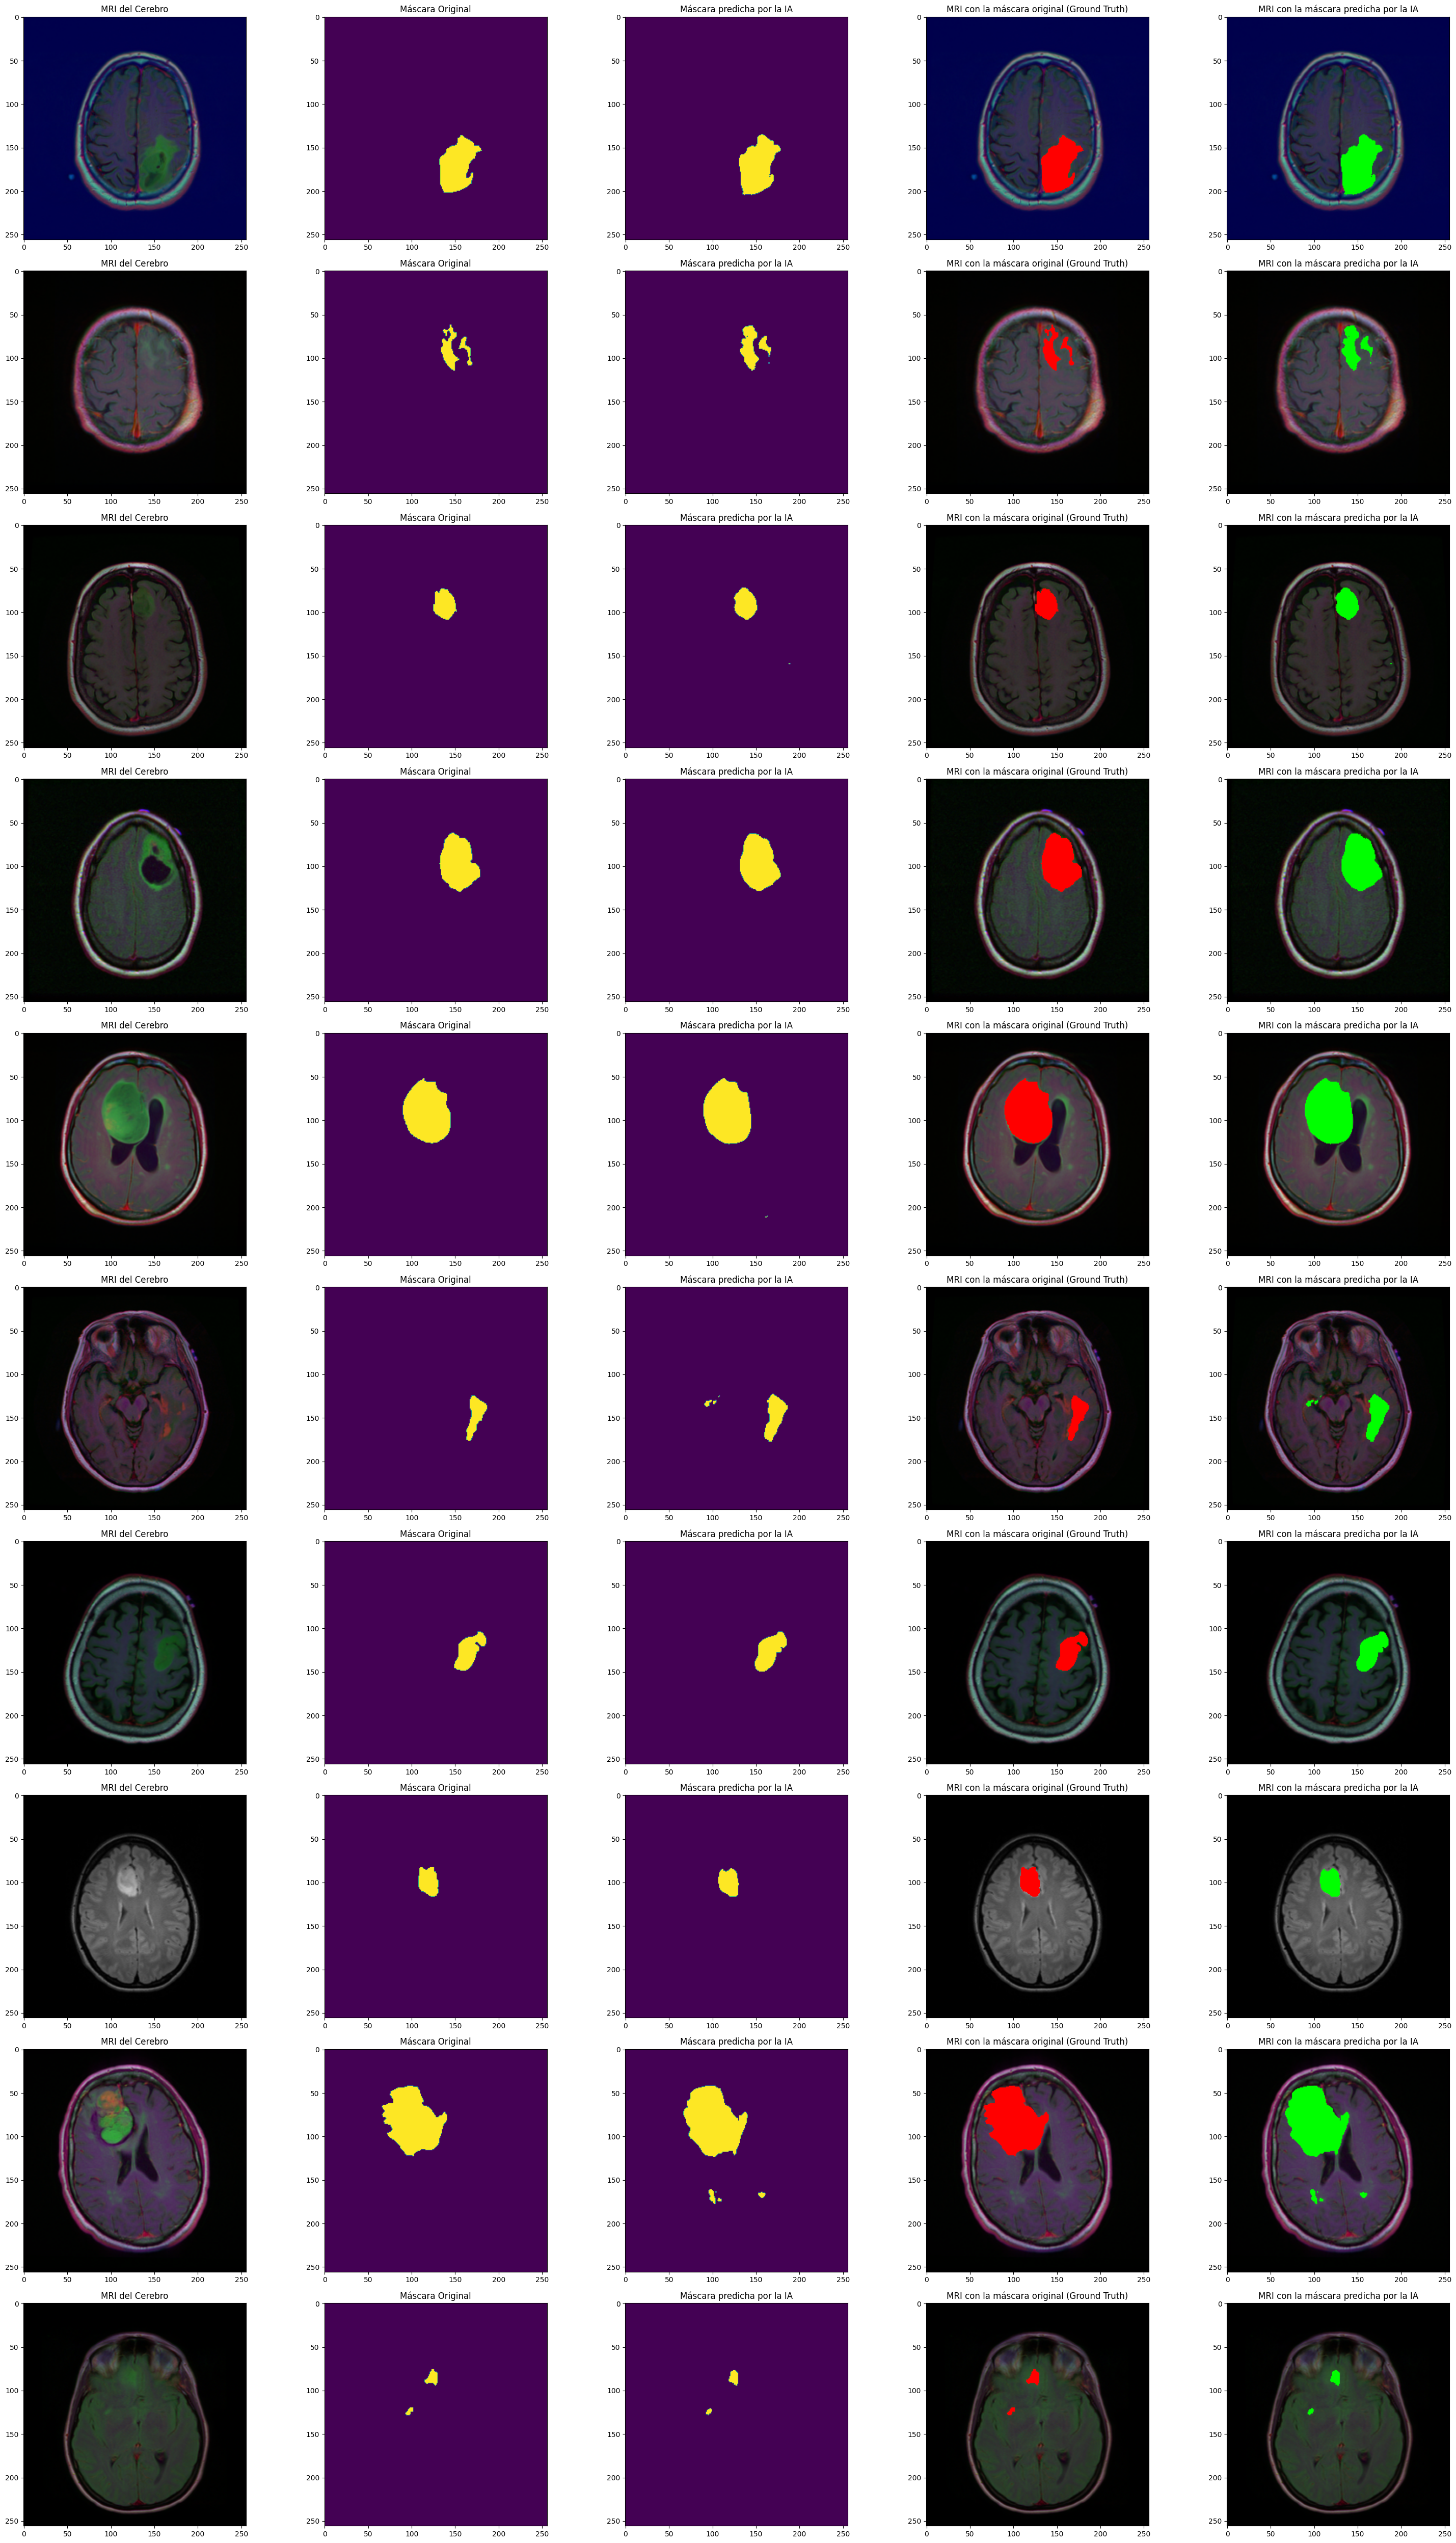

In [66]:
# Generamos un gráfico con 10 muestras distintas con tumores

count = 0 
fig, axs = plt.subplots(10, 5, figsize=(30, 50))
for i in range(len(df_pred)):
    if df_pred['has_mask'][i] == 1 and count < 10: # con esta condicion, nos trae todas mascaras con tumor
        # Construir rutas absolutas a las imágenes y máscaras utilizando la carpeta "dataset"
        img_path = os.path.join('dataset', df_pred.image_path[i]) # a la ruta absoluta se le concatena el dataset y el path de la imagen 
        mask_path = os.path.join('dataset', df_pred.mask_path[i])

        # Leer las imágenes y convertirlas a formato RGB
        img = io.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].title.set_text("MRI del Cerebro")
        axs[count][0].imshow(img)

        # Obtener, de esa misma imagen,  la máscara para la imagen
        mask = io.imread(mask_path)
        axs[count][1].title.set_text("Máscara Original")
        axs[count][1].imshow(mask)

        # Obtenemos la máscara de predicción para dicha imagen
        predicted_mask = np.asarray(df_pred.predicted_mask[i])[0].squeeze().round()
        axs[count][2].title.set_text("Máscara predicha por la IA")
        axs[count][2].imshow(predicted_mask)
        
        # Aplicamos la máscara a la imagen 'mask==255'
        img[mask == 255] = (255, 0, 0)
        axs[count][3].title.set_text("MRI con la máscara original (Ground Truth)")
        axs[count][3].imshow(img)

        img_ = io.imread(img_path)
        img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        img_[predicted_mask == 1] = (0, 255, 0)
        axs[count][4].title.set_text("MRI con la máscara predicha por la IA")
        axs[count][4].imshow(img_)
        count += 1
        
fig.tight_layout() 









# CONCLUSIONES

# el análisis inteligente de imágenes es un campo en constante evolución, debido a las posibilidades que ofrece para la interpretación precisa y automatizada de información visual. 
# Las técnicas de inteligencia artificial y el aprendizaje profundo permiten el procesamiento de grandes cantidades de datos en tiempo real, lo que abre un mundo de posibilidades para la aplicación de estas técnicas en diferentes sectores.

# El uso de la inteligencia artificial en el procesamiento de imágenes ha potenciado enormemente la funcionalidad de reconocimiento y análisis de patrones en diversas aplicaciones. La visión artificial, una rama de la IA, busca imitar el comportamiento inteligente en el procesamiento y análisis de imágenes, mejorando constantemente su precisión y versatilidad.
# En general, el aprendizaje profundo para imágenes es una herramienta poderosa y dinámica para procesar y comprender grandes cantidades de datos visuales. Con la ayuda de algoritmos avanzados y la inteligencia artificial, la tecnología puede transformar imágenes de manera innovadora y reveladora. Las posibilidades son infinitas y sólo se limitan a nuestra imaginación en cómo podemos aplicarla.

# A modo de cierre, vuelvo a aclarar que para cualquier caso que involucre el entrenamiento de una red neuronal convolucional, se obtienen mejores resultados cuando el conjunto de datos de entrenamiento es grande, es decir, entre mas datos, mejor. 
# Con la inclusion de la patologia digital y el aprendizaje de maquina (machine learning) es posible obtener una prediccion mas eficiente de la supervivencia de los pacientes con cancer/tumor basandose 
# en la seleccion automatica de las caracteristicas histologicas. Las tecnicas de procesamiento y clasificacion de las muestras ayuda a reducir los tiempos de diagnositco y analisis de
# los resultados, permitiendo a su vez que los pat´ologos expertos diagnostiquen las muestras con mayor eficiencia, contribuyendo a la supervivencia de los pacientes


